#DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('metadata.csv')

In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,20180514,15:00:00,0.585,1,0.0
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,20160831,16:15:00,5867.500,4,3512.0
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,20201119,0:01:00,0.290,1,514.0
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,20160824,0:01:00,1.614,1,129.0
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,20190723,0:01:00,111.825,3,19.0


In [ ]:
df.shape

(23570, 10)

#checking the structure of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23570 entries, 0 to 23569
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uid                  23570 non-null  object 
 1   data_provider        23570 non-null  object 
 2   region               23570 non-null  object 
 3   lat                  23570 non-null  float64
 4   lon                  23570 non-null  float64
 5   date                 23570 non-null  int64  
 6   time                 23570 non-null  object 
 7   abun                 23570 non-null  float64
 8   severity             23570 non-null  int64  
 9   distance_to_water_m  23569 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


#checking null values

In [ ]:
df.isnull().sum()

,0
uid,0
data_provider,0
region,0
lat,0
lon,0
date,0
time,0
abun,0
severity,0
distance_to_water_m,1


In [ ]:
df['distance_to_water_m'].isnull().sum()


np.int64(1)

In [ ]:
df[df['distance_to_water_m'].isnull()]


,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m
2286,coeo,EPA_National_Aquatic_Research_Survey,west,42.91854,-107.7356,20170818,0:01:00,4350.18,4,NaN


In [ ]:
df.dropna(subset=['distance_to_water_m'], inplace=True)


In [ ]:
df.isnull().sum()

,0
uid,0
data_provider,0
region,0
lat,0
lon,0
date,0
time,0
abun,0
severity,0
distance_to_water_m,0


#checking duplicate values

In [ ]:
df.nunique()

,0
uid,23569
data_provider,14
region,4
lat,8582
lon,11166
date,1637
time,667
abun,14646
severity,5
distance_to_water_m,1587


#changing the format of the date

In [ ]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')


df['date'] = df['date'].dt.strftime('%d/%m/%Y')



In [ ]:

df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,14/05/2018,15:00:00,0.585,1,0.0
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,31/08/2016,16:15:00,5867.500,4,3512.0
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,19/11/2020,0:01:00,0.290,1,514.0
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,24/08/2016,0:01:00,1.614,1,129.0
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,23/07/2019,0:01:00,111.825,3,19.0


#adjusting the columns

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,14/05/2018,15:00:00,0.585,1,0.0
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,31/08/2016,16:15:00,5867.500,4,3512.0
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,19/11/2020,0:01:00,0.290,1,514.0
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,24/08/2016,0:01:00,1.614,1,129.0
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,23/07/2019,0:01:00,111.825,3,19.0
5,aafl,Indiana_State_Department_of_Health,midwest,39.474744,-86.898353,23/08/2021,15:15:00,2017.313,4,0.0
6,aafp,NC_Division_of_Water_Resources_NC_Department_o...,south,35.647742,-79.271782,15/11/2017,0:01:00,1.594,1,743.0
7,aagm,NC_Division_of_Water_Resources_NC_Department_o...,south,35.906885,-79.132962,10/06/2020,0:01:00,3.873,1,774.0
8,aahy,NC_Division_of_Water_Resources_NC_Department_o...,south,35.726522,-79.125458,12/08/2014,0:01:00,6.100,1,697.0
9,aaia,NC_Division_of_Water_Resources_NC_Department_o...,south,35.980000,-78.791686,27/06/2018,0:01:00,16.943,1,377.0


In [ ]:

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

df['month'] = df['date'].dt.month

def get_season(month):
    return ('Winter' if month in [12, 1, 2] else
            'Spring' if month in [3, 4, 5] else
            'Summer' if month in [6, 7, 8] else 'Autumn')

df['season'] = df['month'].apply(get_season)
df.season.value_counts()


,count
season,
Summer,10812
Spring,5045
Autumn,4758
Winter,2954


In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m,month,season
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,15:00:00,0.585,1,0.0,5,Spring
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,16:15:00,5867.500,4,3512.0,8,Summer
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0:01:00,0.290,1,514.0,11,Autumn
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,0:01:00,1.614,1,129.0,8,Summer
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,0:01:00,111.825,3,19.0,7,Summer


In [ ]:
df['is_near_water'] = df['distance_to_water_m'] < 100


In [ ]:
def classify_abundance(abun):
    if abun == 0:
        return "None"
    elif abun < 50:
        return "Low"
    elif abun < 2000:
        return "Moderate"
    else:
        return "High"

df['abundance_class'] = df['abun'].apply(classify_abundance)
df['abundance_class'].value_counts()

,count
abundance_class,
Low,11981
Moderate,6696
High,4715
None,177


In [ ]:
!pip install geopandas shapely


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:
import zipfile

with zipfile.ZipFile("ne_110m_admin_0_countries.zip", 'r') as zip_ref:
    zip_ref.extractall("countries_shapefile")



In [ ]:
import geopandas as gpd

world = gpd.read_file("/content/countries_shapefile/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
usa = world[world['ADMIN'] == "United States of America"]


In [ ]:
df.to_csv("cleaned_metadata.csv", index=False)

In [ ]:
df = pd.read_csv("cleaned_metadata.csv")  # Replace with your file if different


In [ ]:
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')


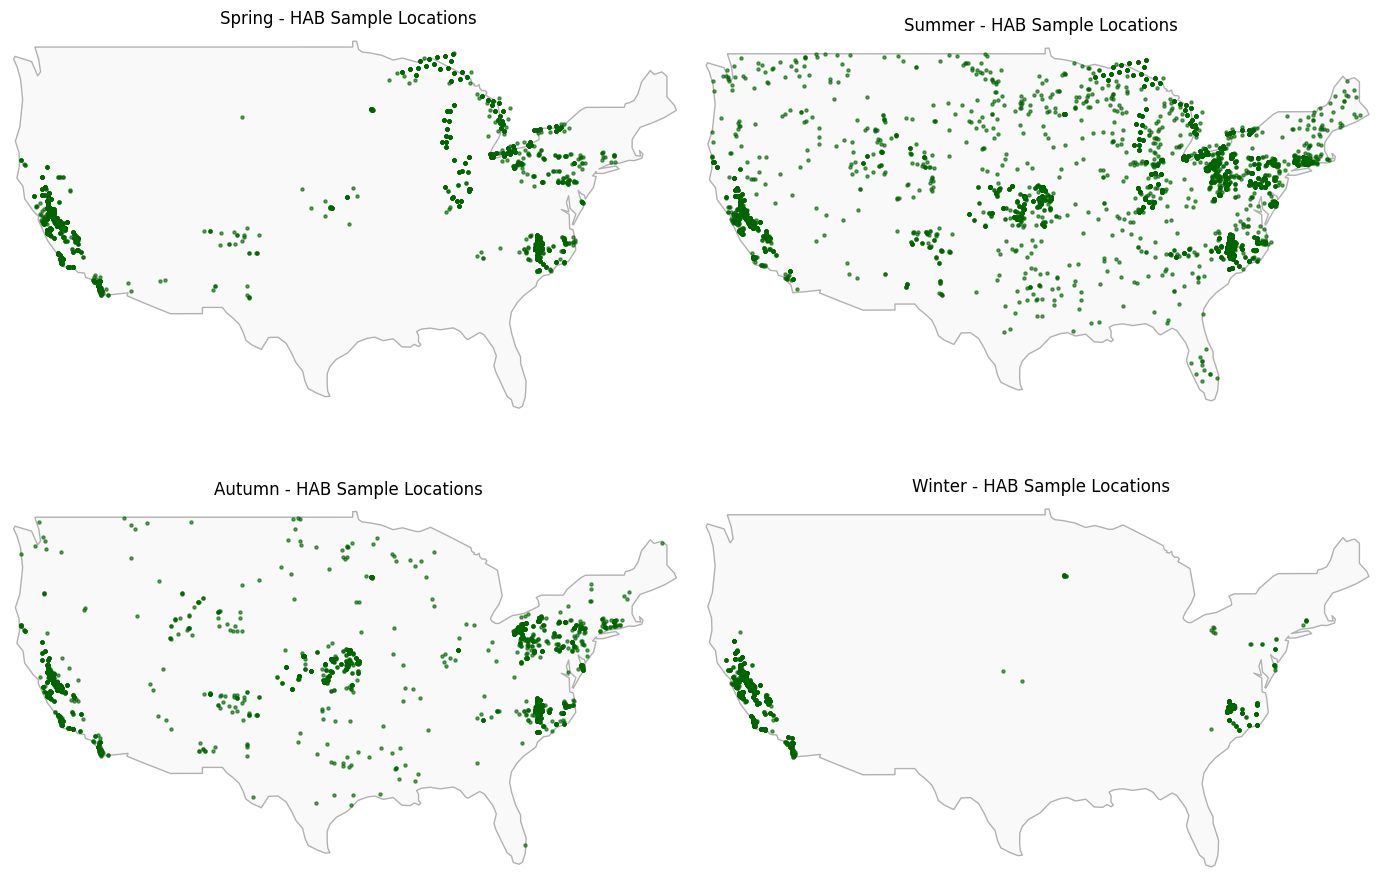

In [ ]:
seasons = gdf['season'].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for season, ax in zip(seasons, axes.flatten()):
    base = usa.plot(ax=ax, color="whitesmoke", edgecolor="gray", alpha=0.6)
    subset = gdf[gdf['season'] == season]
    subset.plot(ax=base, marker="o", color="darkgreen", markersize=5, alpha=0.6)

    ax.set_xlim([-125, -66])
    ax.set_ylim([25, 50])
    ax.set_title(f"{season} - HAB Sample Locations", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Reload the file to get the original 'date' column back
df = pd.read_csv('cleaned_metadata.csv')



In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m,month,season,is_near_water,abundance_class
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,15:00:00,0.585,1,0.0,5,Spring,True,Low
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,16:15:00,5867.500,4,3512.0,8,Summer,False,High
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0:01:00,0.290,1,514.0,11,Autumn,False,Low
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,0:01:00,1.614,1,129.0,8,Summer,False,Low
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,0:01:00,111.825,3,19.0,7,Summer,True,Moderate


In [ ]:

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df['year'] = df['date'].dt.year


In [ ]:
print(sorted(df['year'].dropna().astype(int).unique().tolist()))



[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m,month,season,is_near_water,abundance_class,year
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,15:00:00,0.585,1,0.0,5,Spring,True,Low,2018
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,16:15:00,5867.500,4,3512.0,8,Summer,False,High,2016
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0:01:00,0.290,1,514.0,11,Autumn,False,Low,2020
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,0:01:00,1.614,1,129.0,8,Summer,False,Low,2016
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,0:01:00,111.825,3,19.0,7,Summer,True,Moderate,2019


<ipython-input-42-2724673438>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette ="inferno")


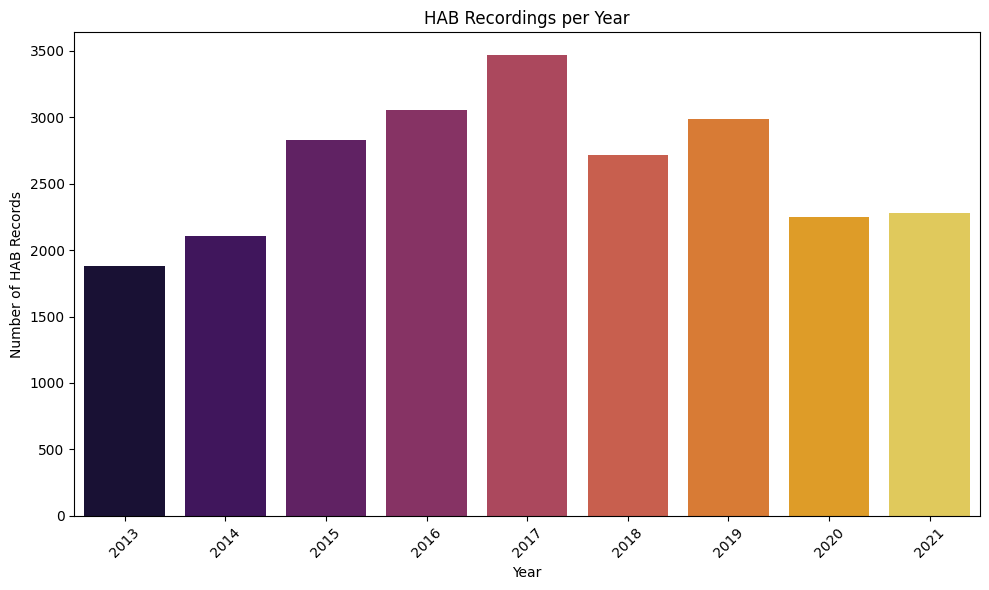

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of records per year
year_counts = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette ="inferno")
plt.xlabel("Year")
plt.ylabel("Number of HAB Records")
plt.title("HAB Recordings per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


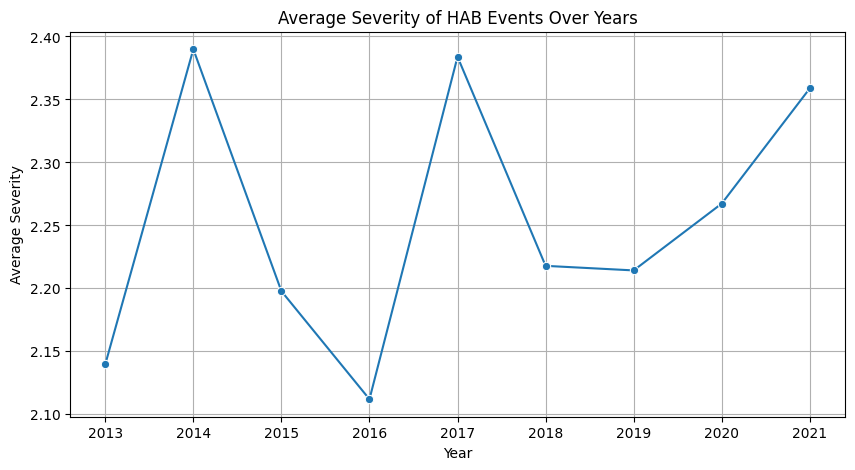

In [ ]:
severity_trend = df.groupby("year")["severity"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=severity_trend.index, y=severity_trend.values, marker="o")
plt.title("Average Severity of HAB Events Over Years")
plt.xlabel("Year")
plt.ylabel("Average Severity")
plt.grid(True)
plt.show()


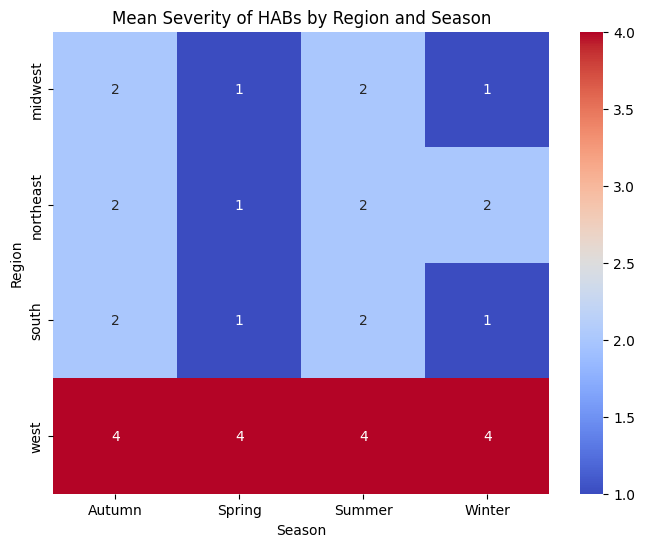

In [ ]:
seasonal_heatmap = df.pivot_table(
    index='region',
    columns='season',
    values='severity',
    aggfunc='mean'
).round().astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(seasonal_heatmap, annot=True, cmap='coolwarm', fmt="d")  # fmt="d" = integer display
plt.title("Mean Severity of HABs by Region and Season")
plt.ylabel("Region")
plt.xlabel("Season")
plt.show()


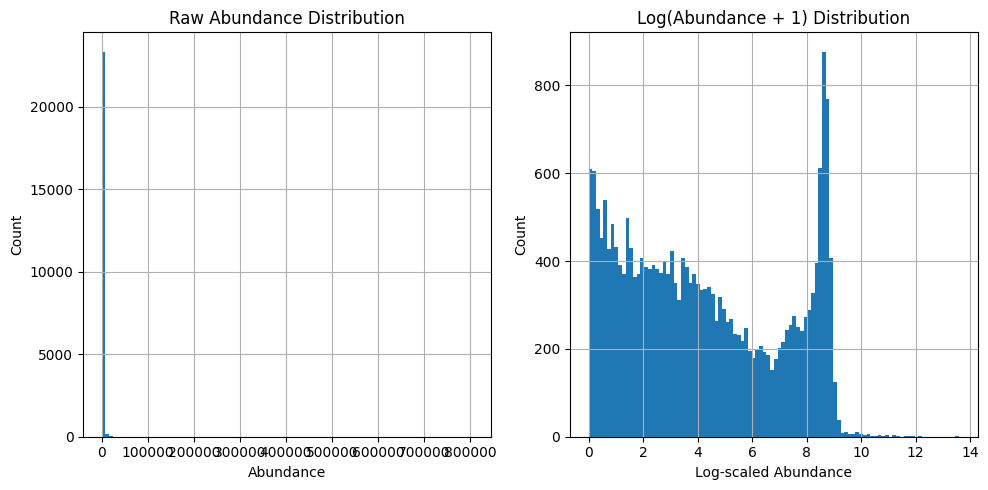

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Raw distribution
plt.subplot(1, 2, 1)
df['abun'].hist(bins=100)
plt.title("Raw Abundance Distribution")
plt.xlabel("Abundance")
plt.ylabel("Count")

# Log-scaled distribution
plt.subplot(1, 2, 2)
np.log1p(df['abun']).hist(bins=100)
plt.title("Log(Abundance + 1) Distribution")
plt.xlabel("Log-scaled Abundance")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
df['log_abun'] = np.log1p(df['abun'])  # at ml, just a refrnc.


In [ ]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m,month,season,is_near_water,abundance_class,year,log_abun
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,15:00:00,0.585,1,0.0,5,Spring,True,Low,2018,0.460584
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,16:15:00,5867.500,4,3512.0,8,Summer,False,High,2016,8.677354
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0:01:00,0.290,1,514.0,11,Autumn,False,Low,2020,0.254642
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,0:01:00,1.614,1,129.0,8,Summer,False,Low,2016,0.960882
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,0:01:00,111.825,3,19.0,7,Summer,True,Moderate,2019,4.725838


In [ ]:
print("Total Samples:", len(df))
print("Date Range:", df['date'].min(), "to", df['date'].max())
print("Regions:", df['region'].nunique())
print("Seasons:", df['season'].unique())
print("Average Severity:", round(df['severity'].mean(), 2))



Total Samples: 23569
Date Range: 2013-01-04 00:00:00 to 2021-12-29 00:00:00
Regions: 4
Seasons: ['Spring' 'Summer' 'Autumn' 'Winter']
Average Severity: 2.25


<Axes: xlabel='season', ylabel='severity'>

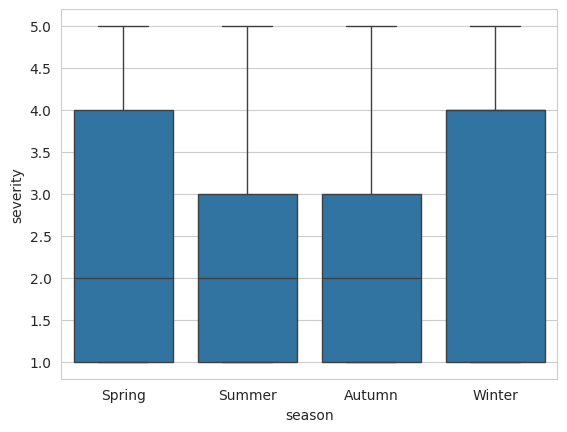

In [70]:
sns.boxplot(x='season', y='severity', data=df)



<Axes: xlabel='is_near_water', ylabel='severity'>

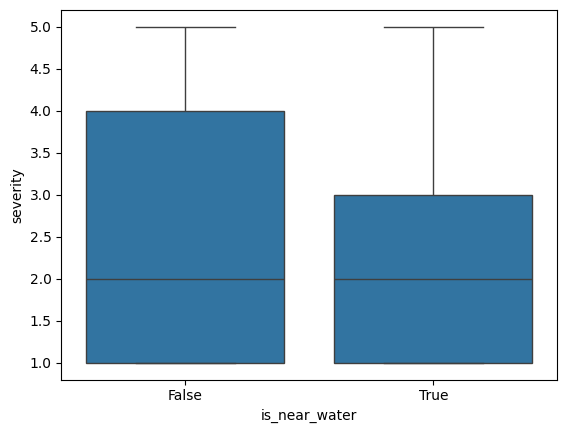

In [ ]:
sns.boxplot(x='is_near_water', y='severity', data=df)


<Axes: xlabel='region', ylabel='abun'>

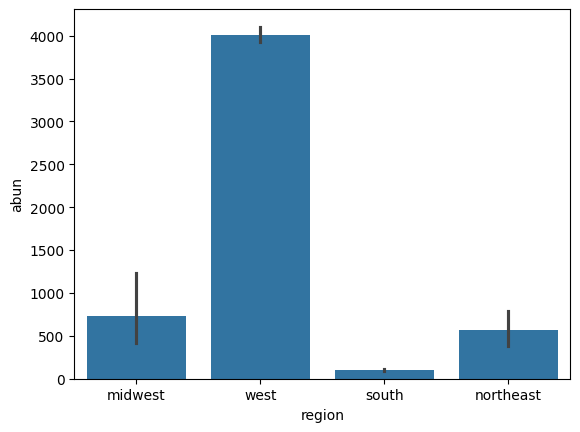

In [ ]:
sns.barplot(x='region', y='abun', data=df)



<Axes: xlabel='region', ylabel='severity'>

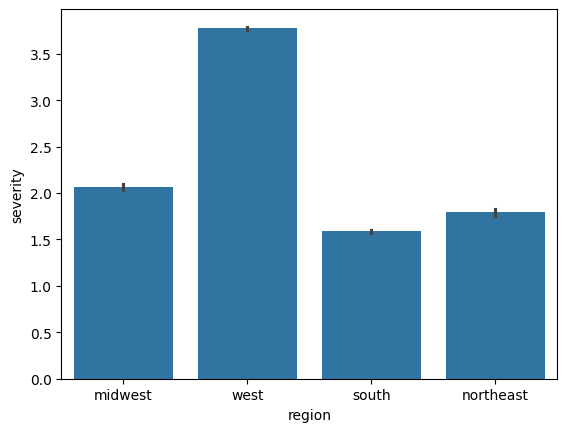

In [ ]:
sns.barplot(x='region', y='severity', data=df)

In [ ]:
df.to_csv("metadata2.csv", index=False)

Text(0.5, 1.0, 'Abundance vs Distance to Water')

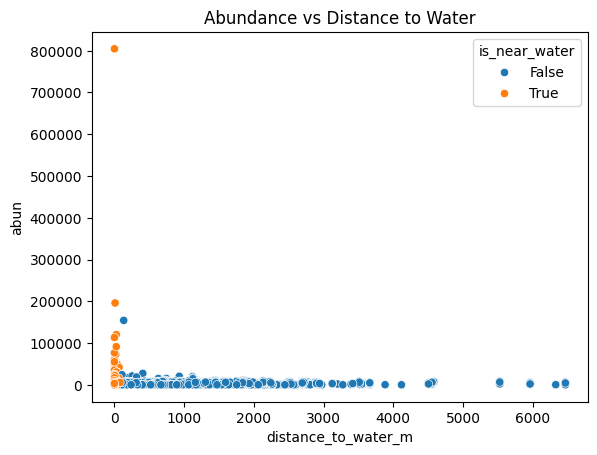

In [59]:
sns.scatterplot(data=df, x='distance_to_water_m', y='abun', hue='is_near_water')
plt.title('Abundance vs Distance to Water')


In [62]:
import pandas as pd
import calendar

# Load the cleaned dataset
df = pd.read_csv("metadata2.csv")

# Group by month and calculate the mean abundance for each month
monthly_avg = df.groupby('month')['abun'].mean().reset_index()

# Map numeric month to month name for labeling
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda m: calendar.month_name[m])
monthly_avg = monthly_avg.sort_values('month')  # ensure months 1-12 are in order
print(monthly_avg.head(12))  # Optional: view the average values per month


    month         abun month_name
0       1  2703.709478    January
1       2  2212.385015   February
2       3  2282.089867      March
3       4  1835.312376      April
4       5  1114.627272        May
5       6   762.693852       June
6       7   791.212871       July
7       8   765.228246     August
8       9  1190.750129  September
9      10  1536.135583    October
10     11  1525.598863   November
11     12  2168.625475   December


<ipython-input-63-3926176653>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month_name", y="abun", data=monthly_avg,


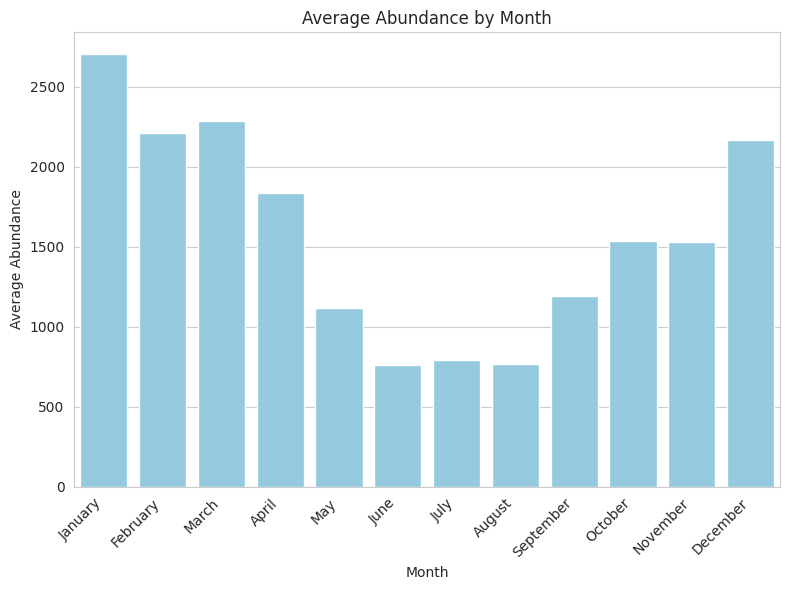

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")  # adds a light grid background

# Define the order of months by name to ensure correct sorting on the x-axis
month_order = [calendar.month_name[m] for m in range(1, 13)]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="month_name", y="abun", data=monthly_avg,
            order=month_order, color="skyblue", ci=None)  # using a single color for all bars

# Customize the axes labels and ticks
plt.xlabel("Month")
plt.ylabel("Average Abundance")
plt.title("Average Abundance by Month")
plt.xticks(rotation=45, ha='right')  # rotate month labels 45° for readability:contentReference[oaicite:4]{index=4}

plt.tight_layout()  # adjust layout to prevent label cutoff
plt.show()


In [64]:
df.head()

,uid,data_provider,region,lat,lon,date,time,abun,severity,distance_to_water_m,month,season,is_near_water,abundance_class,year,log_abun
0,aabm,Indiana_State_Department_of_Health,midwest,39.080319,-86.430867,2018-05-14,15:00:00,0.585,1,0.0,5,Spring,True,Low,2018,0.460584
1,aabn,California_Environmental_Data_Exchange_Network,west,36.559700,-121.510000,2016-08-31,16:15:00,5867.500,4,3512.0,8,Summer,False,High,2016,8.677354
2,aacd,NC_Division_of_Water_Resources_NC_Department_o...,south,35.875083,-78.878434,2020-11-19,0:01:00,0.290,1,514.0,11,Autumn,False,Low,2020,0.254642
3,aaee,NC_Division_of_Water_Resources_NC_Department_o...,south,35.487000,-79.062133,2016-08-24,0:01:00,1.614,1,129.0,8,Summer,False,Low,2016,0.960882
4,aaff,Bureau_of_Water_Kansas_Department_of_Health_an...,midwest,38.049471,-99.827001,2019-07-23,0:01:00,111.825,3,19.0,7,Summer,True,Moderate,2019,4.725838


In [65]:
# Convert time column to datetime if not already
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour


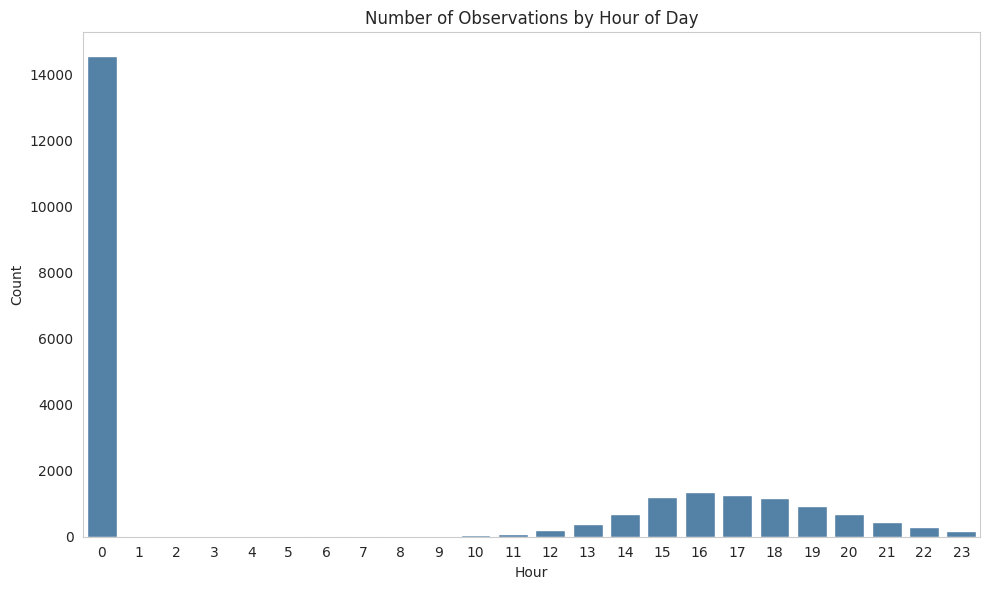

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, color='steelblue')
plt.title("Number of Observations by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


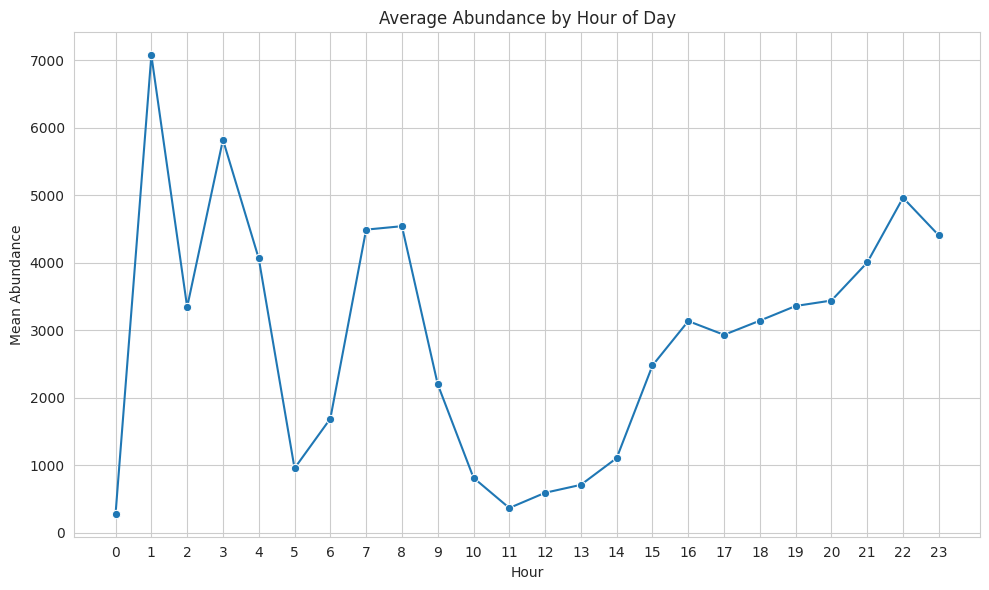

In [67]:
avg_by_hour = df.groupby('hour')['abun'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='abun', data=avg_by_hour, marker='o')
plt.title("Average Abundance by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Mean Abundance")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


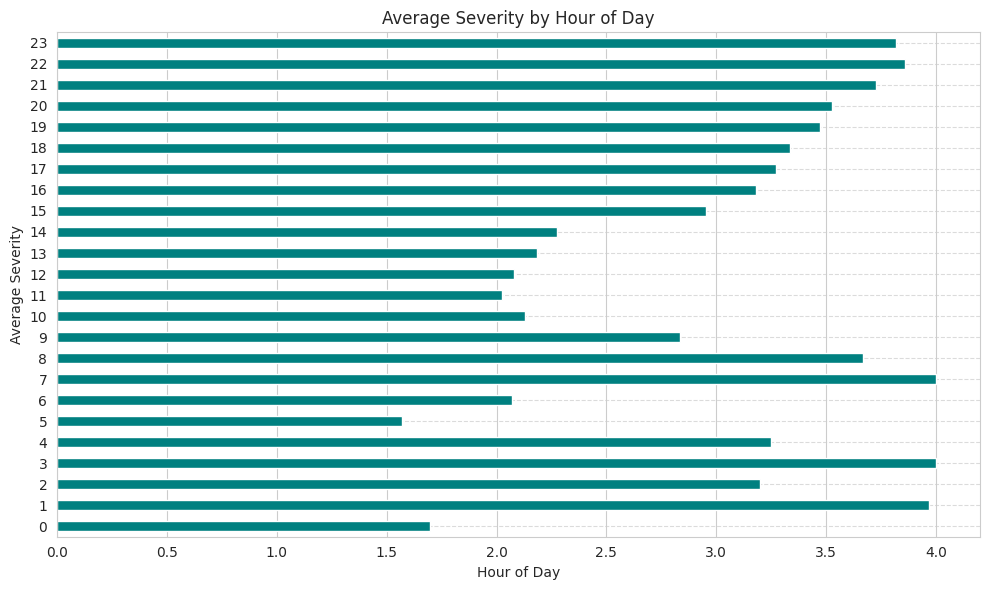

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'time' is parsed as datetime if it's still a string
# Changed 'metadata2' to 'df'
df['parsed_time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce')

# Extract hour from time
# Changed 'metadata2' to 'df'
df['hour'] = df['parsed_time'].dt.hour

# Group by hour and calculate mean severity
# Changed 'metadata2' to 'df'
hourly_severity = df.groupby('hour')['severity'].mean()

# Plotting
plt.figure(figsize=(10, 6))
hourly_severity.plot(kind='barh', color='teal')
plt.title('Average Severity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Severity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

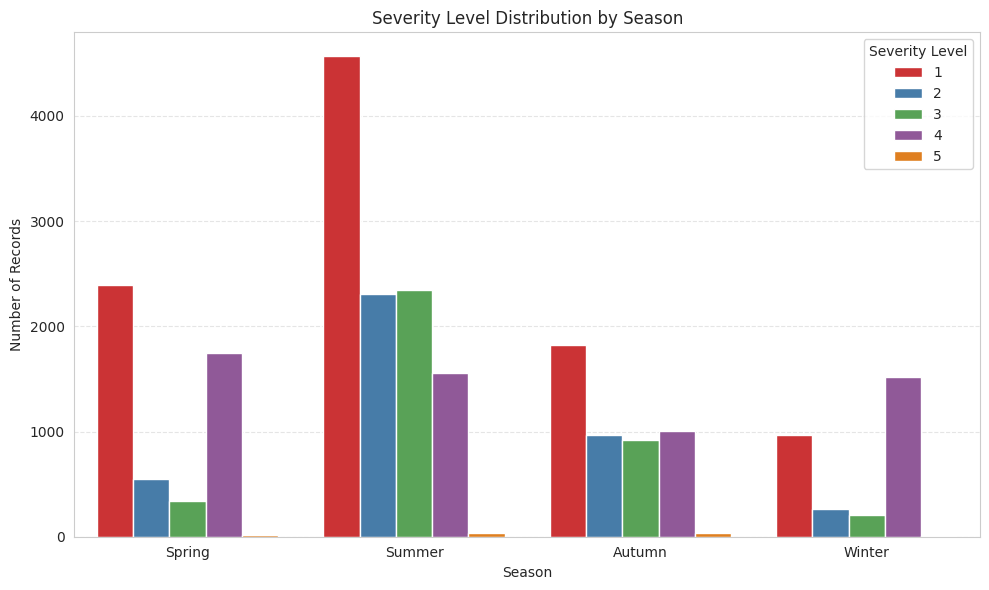

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Use 'df' instead of 'metadata2' as the dataframe
sns.countplot(data=df, x='season', hue='severity', palette='Set1', order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('Severity Level Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Records')
plt.legend(title='Severity Level')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()